<a href="https://colab.research.google.com/github/Tommy840602/OpenCV/blob/main/Learning_OpenCV_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Number of Contours found = 4


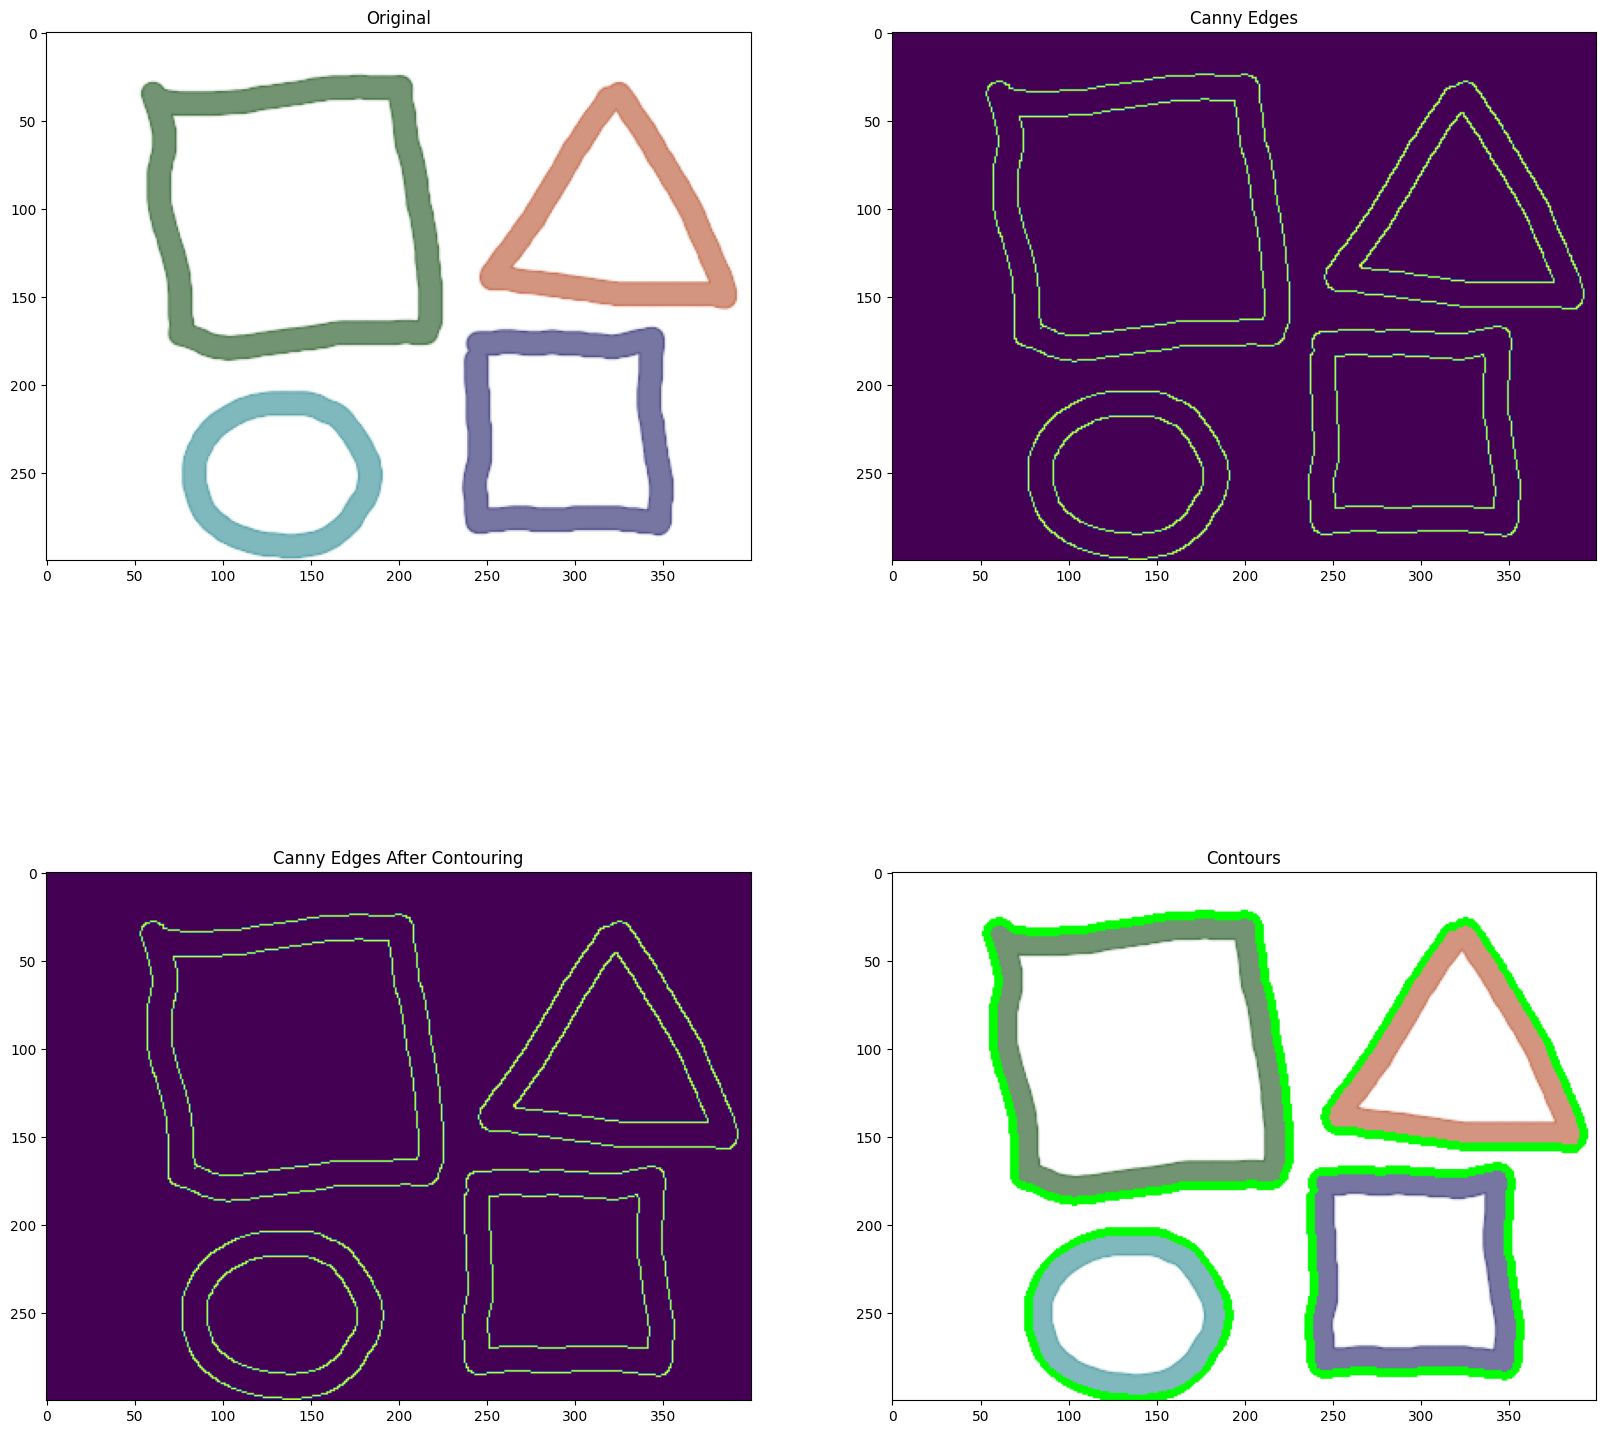

In [12]:
#Contours
image = cv2.imread('/content/pic3.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

# Grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

# Find Canny edges
edged = cv2.Canny(gray, 30, 200)

plt.subplot(2, 2, 2)
plt.title("Canny Edges")
plt.imshow(edged)

# Finding Contours
# Use a copy of your image e.g. edged.copy(), since findContours alters the image
contours, hierarchy = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

plt.subplot(2, 2, 3)
plt.title("Canny Edges After Contouring")
plt.imshow(edged)

print("Number of Contours found = " + str(len(contours)))

# Draw all contours
# Use '-1' as the 3rd parameter to draw all
cv2.drawContours(image, contours, -1, (0,255,0), 3)

plt.subplot(2, 2, 4)
plt.title("Contours")
plt.imshow(image)

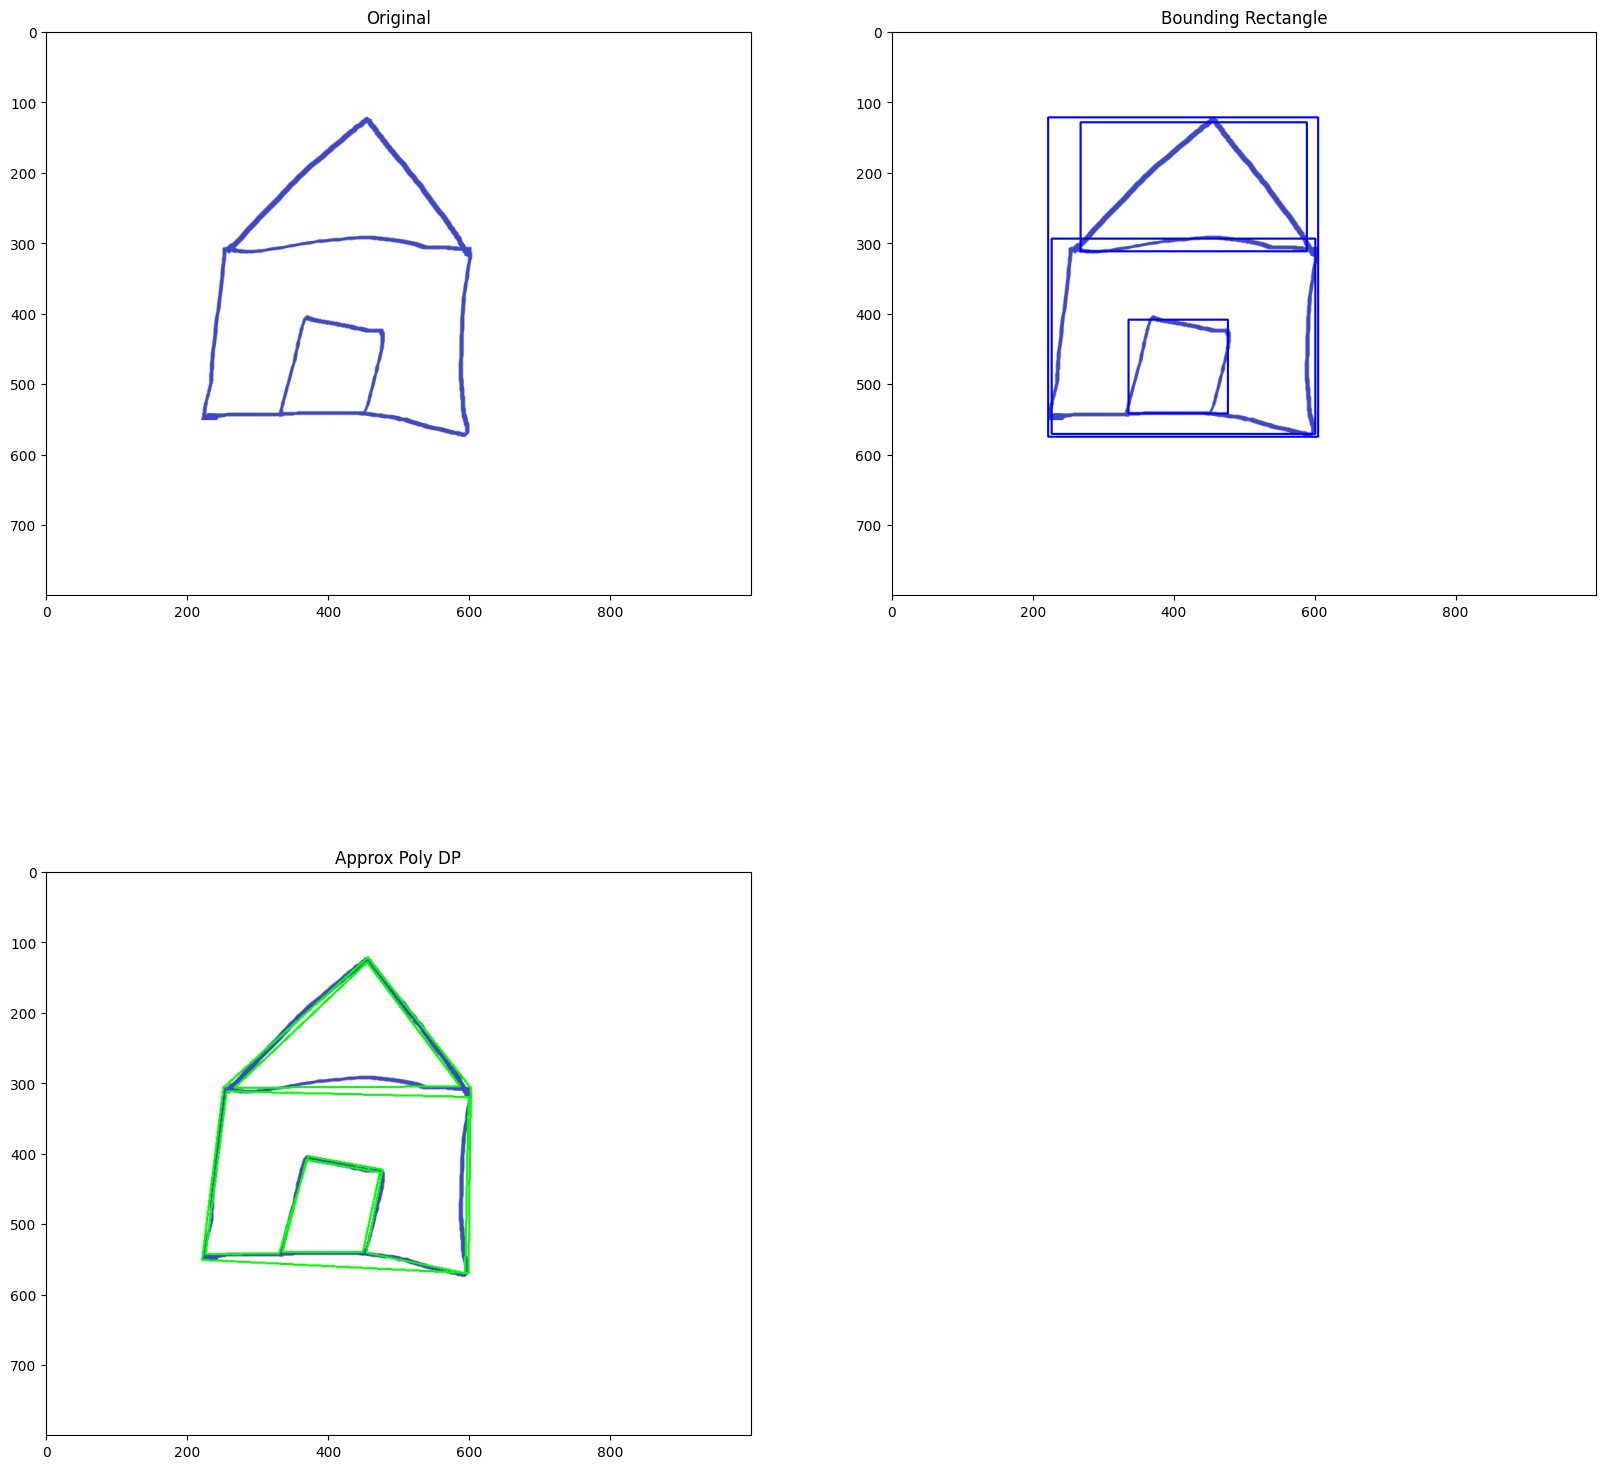

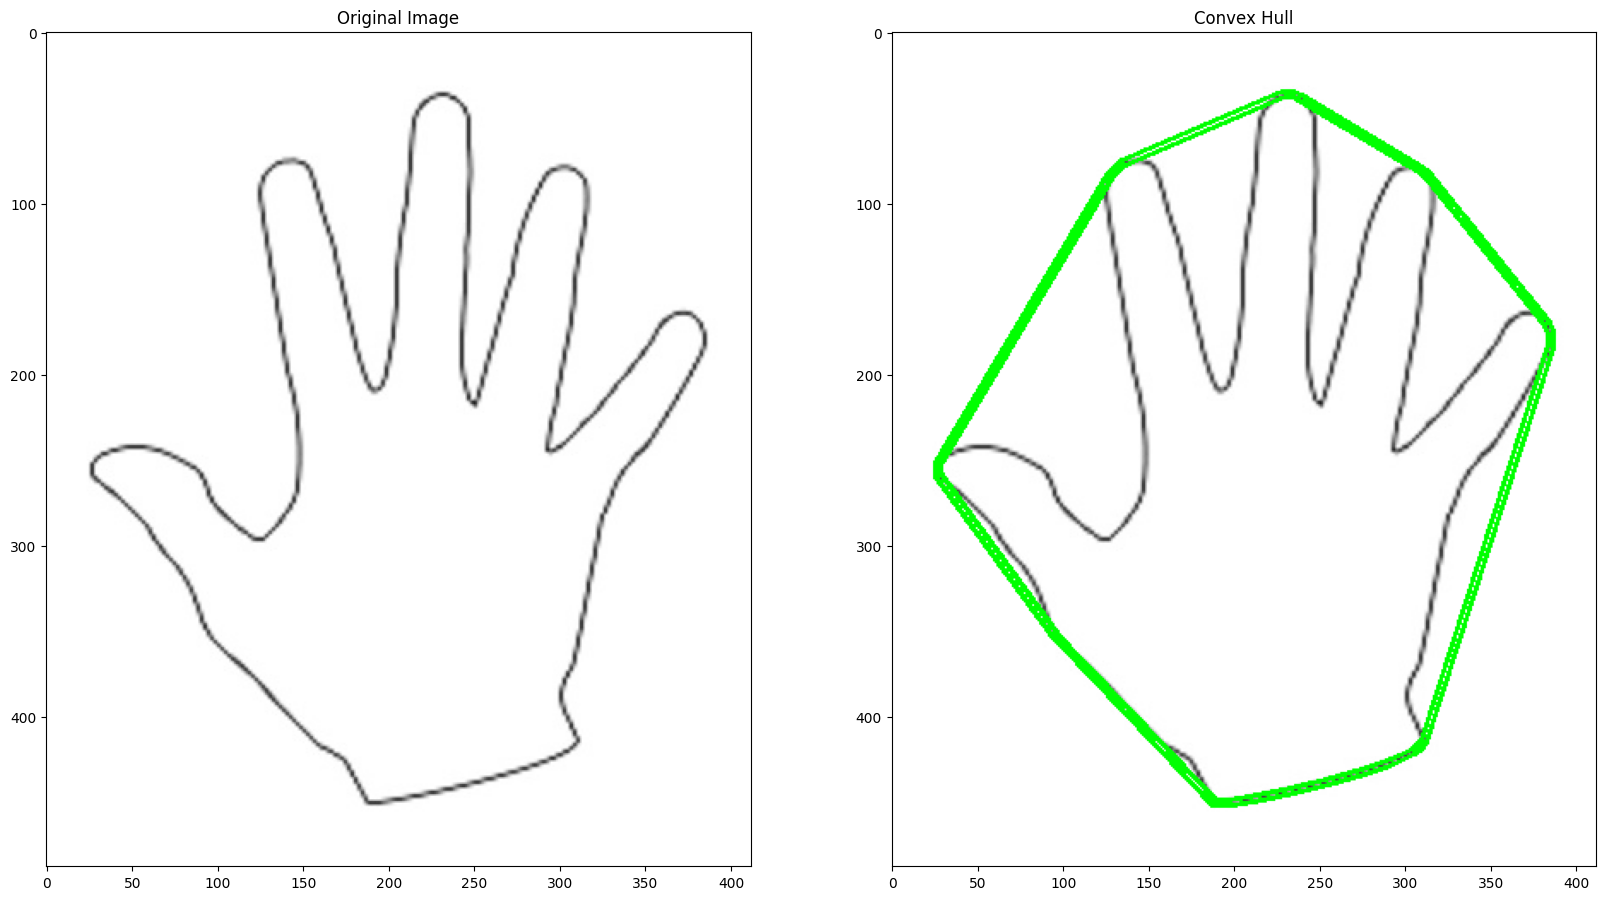

In [13]:
#Approximating Contours and Convex Hull
image = cv2.imread('/content/house.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

orig_image = image.copy()

# Grayscale and binarize
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)

# Find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Iterate through each contour and compute the bounding rectangle
for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(orig_image,(x,y),(x+w,y+h),(0,0,255),2)
    plt.subplot(2, 2, 2)
    plt.title("Bounding Rectangle")
    plt.imshow(orig_image)

cv2.waitKey(0)

# Iterate through each contour and compute the approx contour
for c in contours:
    # Calculate accuracy as a percent of the contour perimeter
    accuracy = 0.03 * cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, accuracy, True)
    cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)

    plt.subplot(2, 2, 3)
    plt.title("Approx Poly DP")
    plt.imshow(image)

plt.show()

# Convex Hull

image = cv2.imread('/content/hand.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))

plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)

# Threshold the image
ret, thresh = cv2.threshold(gray, 176, 255, 0)

# Find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

# Sort Contors by area and then remove the largest frame contour
n = len(contours) - 1
contours = sorted(contours, key=cv2.contourArea, reverse=False)[:n]

# Iterate through contours and draw the convex hull
for c in contours:
    hull = cv2.convexHull(c)
    cv2.drawContours(image, [hull], 0, (0, 255, 0), 2)

    plt.subplot(1, 2, 2)
    plt.title("Convex Hull")
    plt.imshow(image)

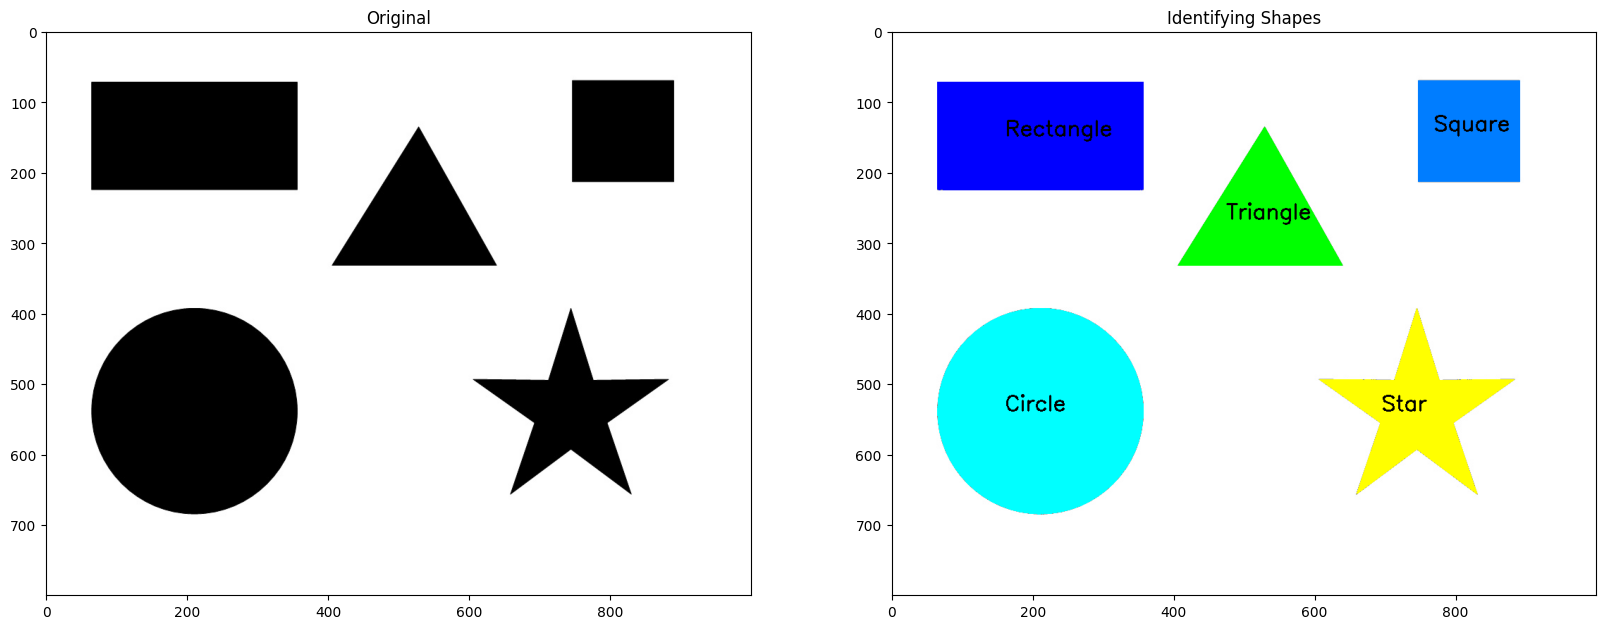

In [14]:
#Identifiy Contours by Shape
image = cv2.imread('/content/someshapes.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(20, 20))

plt.subplot(2, 2, 1)
plt.title("Original")
plt.imshow(image)

ret, thresh = cv2.threshold(gray, 127, 255, 1)

# Extract Contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for cnt in contours:

    # Get approximate polygons
    approx = cv2.approxPolyDP(cnt, 0.01*cv2.arcLength(cnt,True),True)

    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image,[cnt],0,(0,255,0),-1)

        # Find contour center to place text at the center
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    elif len(approx) == 4:
        x,y,w,h = cv2.boundingRect(cnt)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        # Check to see if 4-side polygon is square or rectangle
        # cv2.boundingRect returns the top left and then width and
        if abs(w-h) <= 3:
            shape_name = "Square"

            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 125 ,255), -1)
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
        else:
            shape_name = "Rectangle"

            # Find contour center to place text at the center
            cv2.drawContours(image, [cnt], 0, (0, 0, 255), -1)
            M = cv2.moments(cnt)
            cx = int(M['m10'] / M['m00'])
            cy = int(M['m01'] / M['m00'])
            cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)



    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), -1)
        M = cv2.moments(cnt)
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])
        cv2.putText(image, shape_name, (cx-50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

plt.subplot(2, 2, 2)
plt.title("Identifying Shapes")
plt.imshow(image)

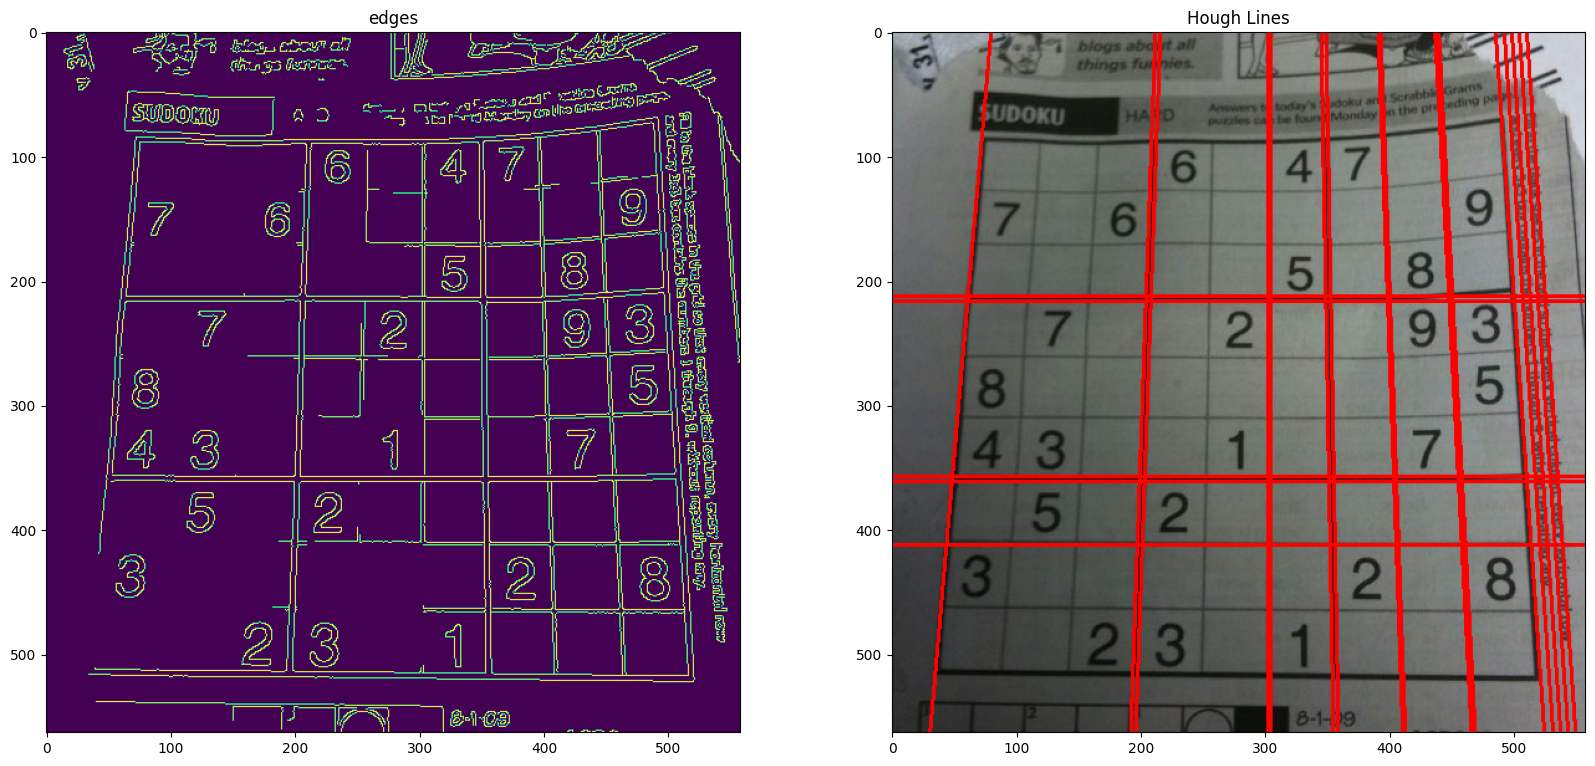

In [15]:
#Line Detection - Using Hough Lines
image = cv2.imread('/content/sudoku.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

# Grayscale and Canny Edges extracted
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 170, apertureSize = 3)

plt.subplot(2, 2, 1)
plt.title("edges")
plt.imshow(edges)

# Run HoughLines using a rho accuracy of 1 pixel
# theta accuracy of np.pi / 180 which is 1 degree
# Our line threshold is set to 240 (number of points on line)
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

# We iterate through each line and convert it to the format
# required by cv.lines (i.e. requiring end points)
for line in lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))
    cv2.line(image, (x1, y1), (x2, y2), (255, 0, 0), 2)

plt.subplot(2, 2, 2)
plt.title("Hough Lines")
plt.imshow(image)

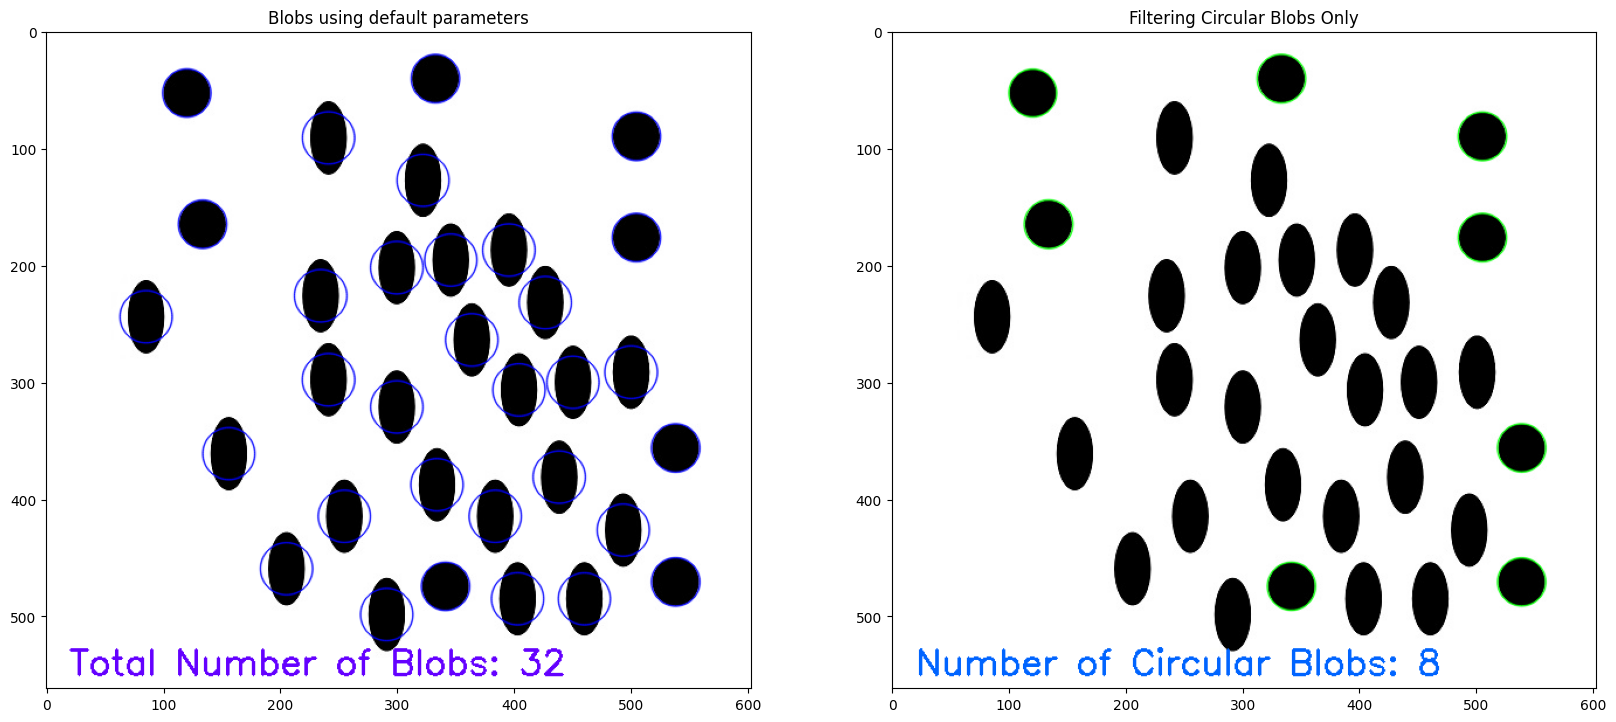

In [16]:
#Counting Circles and Ellipses
image = cv2.imread('/content/blobs.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20, 20))

# Intialize the detector using the default parameters
detector = cv2.SimpleBlobDetector_create()

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
number_of_blobs = len(keypoints)
text = "Total Number of Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 0, 255), 2)

# Display image with blob keypoints
plt.subplot(2, 2, 1)
plt.title("Blobs using default parameters")
plt.imshow(blobs)

# Set our filtering parameters
# Initialize parameter settiing using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2

# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,255,0),
                                      cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
plt.subplot(2, 2, 2)
plt.title("Filtering Circular Blobs Only")
plt.imshow(blobs)

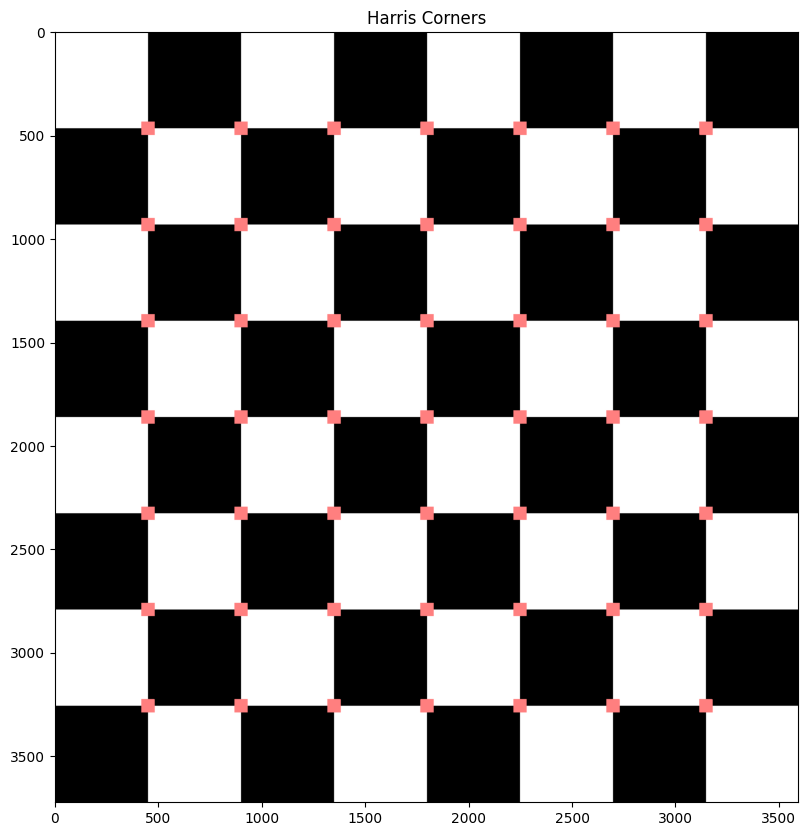

In [17]:
#Finding Corners
image = cv2.imread('/content/chessboard.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# The cornerHarris function requires the array datatype to be float32
gray = np.float32(gray)

harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

#We use dilation of the corner points to enlarge them\
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 10)

# Threshold for an optimal value, it may vary depending on the image.
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

plt.subplot(1, 1, 1)
plt.title("Harris Corners")
plt.imshow(image)

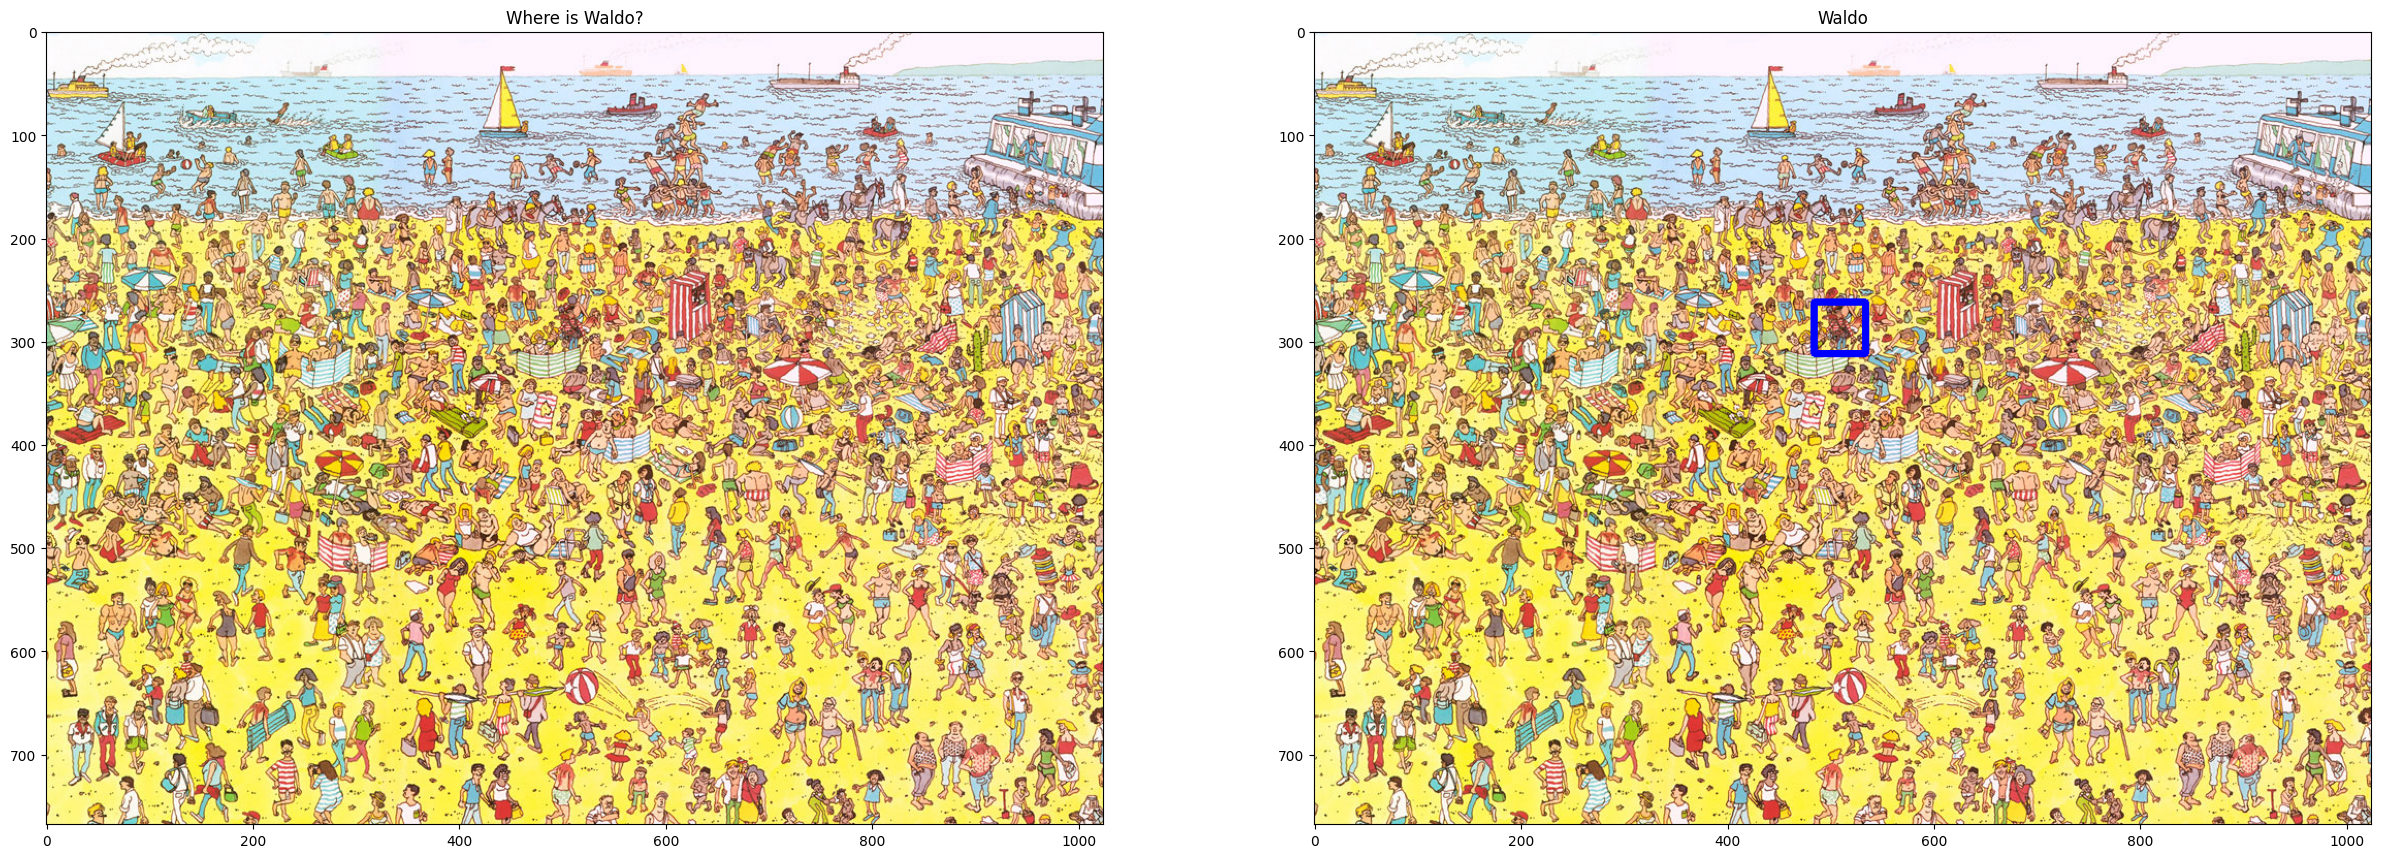

In [18]:
#Finding Waldo
image = cv2.imread('/content/WaldoBeach.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30, 30))

plt.subplot(2, 2, 1)
plt.title("Where is Waldo?")
plt.imshow(image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Load Template image
template = cv2.imread('/content/waldo.jpg',0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

#Create Bounding Box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0,0,255), 5)

plt.subplot(2, 2, 2)
plt.title("Waldo")
plt.imshow(image)

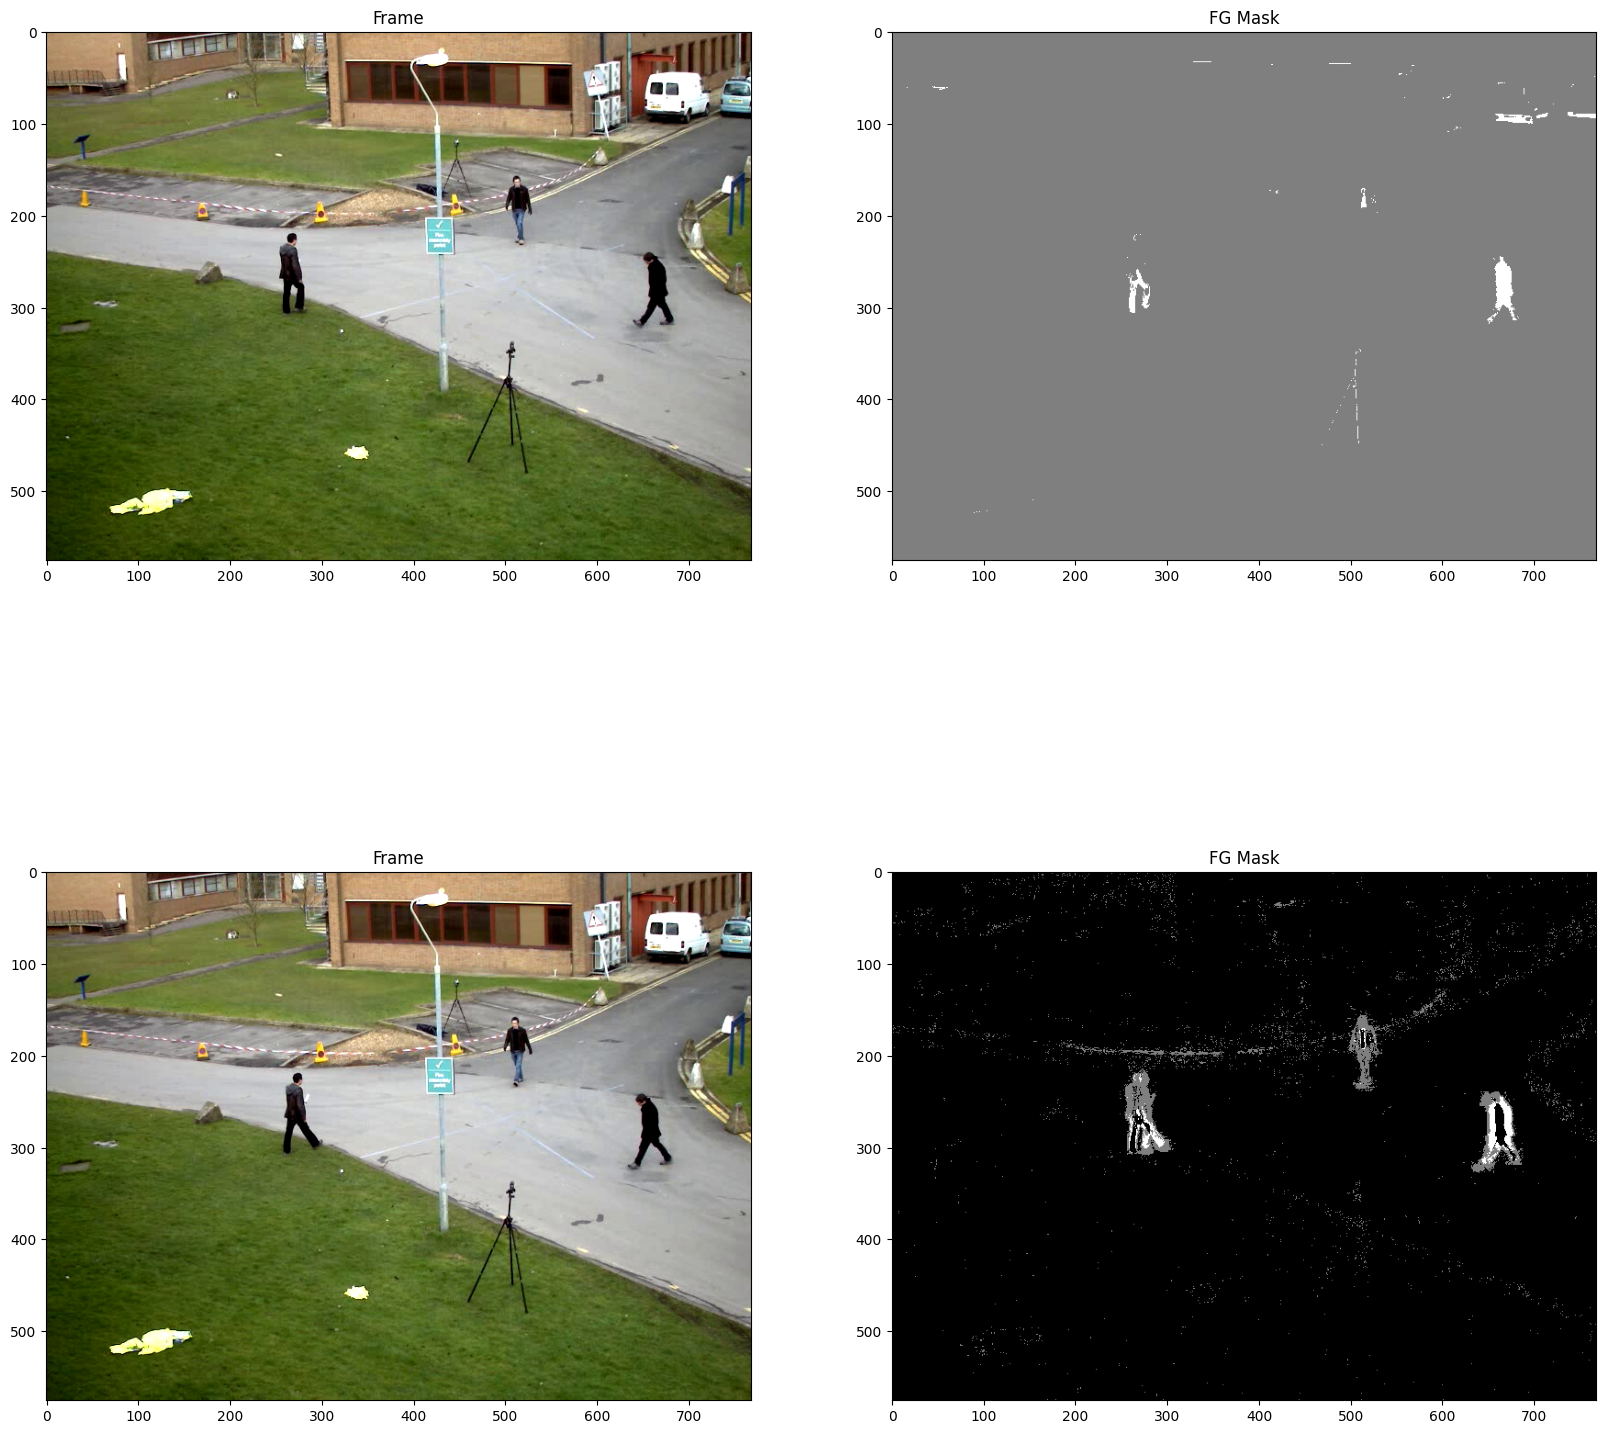

In [19]:
#Background Subtraction Methods
import cv2
import matplotlib.pyplot as plt

algo = 'MOG2'

if algo == 'MOG2':
    backSub = cv2.createBackgroundSubtractorMOG2()
else:
    backSub = cv2.createBackgroundSubtractorKNN()

plt.figure(figsize=(20, 20))

frame = cv2.imread('/content/Background_Subtraction_Tutorial_frame.png')
fgMask = backSub.apply(frame)

plt.subplot(2, 2, 1)
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 2)
plt.title("FG Mask")
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))

frame = cv2.imread('/content/Background_Subtraction_Tutorial_frame_1.png')
fgMask = backSub.apply(frame)

plt.subplot(2, 2, 3)
plt.title("Frame")
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

plt.subplot(2, 2, 4)
plt.title("FG Mask")
plt.imshow(cv2.cvtColor(fgMask, cv2.COLOR_BGR2RGB))

In [20]:
#Mirrors Using OpenCV
!pip install vcam

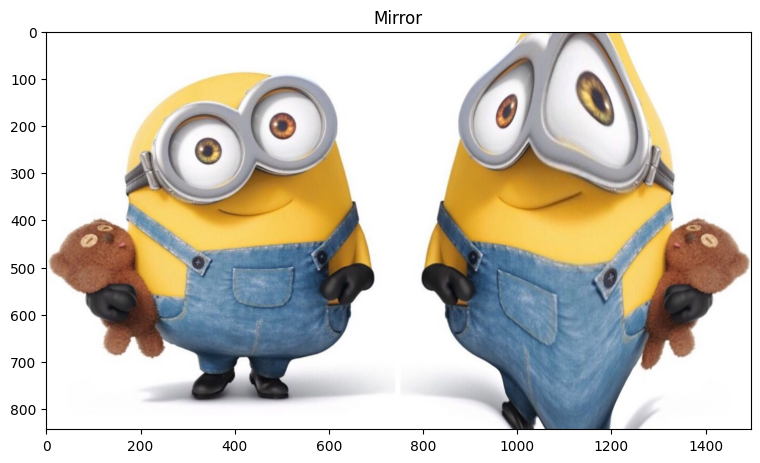

In [22]:
import cv2
import numpy as np
import math
from vcam import vcam,meshGen
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))

# Reading the input image. Pass the path of image you would like to use as input image.
img = cv2.imread("/content/minions.jpg")
H,W = img.shape[:2]

# Creating the virtual camera object
c1 = vcam(H=H,W=W)

# Creating the surface object
plane = meshGen(H,W)

# We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*exp^((x/w)^2 / 2*0.1*sqrt(2*pi))

plane.Z += 20*np.exp(-0.5*((plane.X*1.0/plane.W)/0.1)**2)/(0.1*np.sqrt(2*np.pi))
pts3d = plane.getPlane()

pts2d = c1.project(pts3d)
map_x,map_y = c1.getMaps(pts2d)

output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)

plt.subplot(1, 2,1)
plt.title("Mirror")
plt.imshow(cv2.cvtColor(np.hstack((img,output)), cv2.COLOR_BGR2RGB))

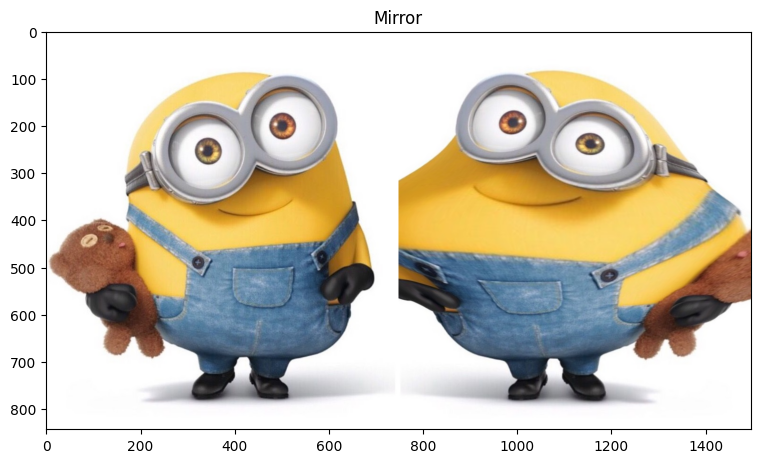

In [23]:
plt.figure(figsize=(20, 20))

# Reading the input image. Pass the path of image you would like to use as input image.
img = cv2.imread("/content/minions.jpg")
H,W = img.shape[:2]

# Creating the virtual camera object
c1 = vcam(H=H,W=W)

# Creating the surface object
plane = meshGen(H,W)

# We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*exp^((y/h)^2 / 2*0.1*sqrt(2*pi))
plane.Z += 20*np.exp(-0.5*((plane.Y*1.0/plane.H)/0.1)**2)/(0.1*np.sqrt(2*np.pi))

pts3d = plane.getPlane()

pts2d = c1.project(pts3d)
map_x,map_y = c1.getMaps(pts2d)

output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)

plt.subplot(1, 2,1)
plt.title("Mirror")
plt.imshow(cv2.cvtColor(np.hstack((img,output)), cv2.COLOR_BGR2RGB))

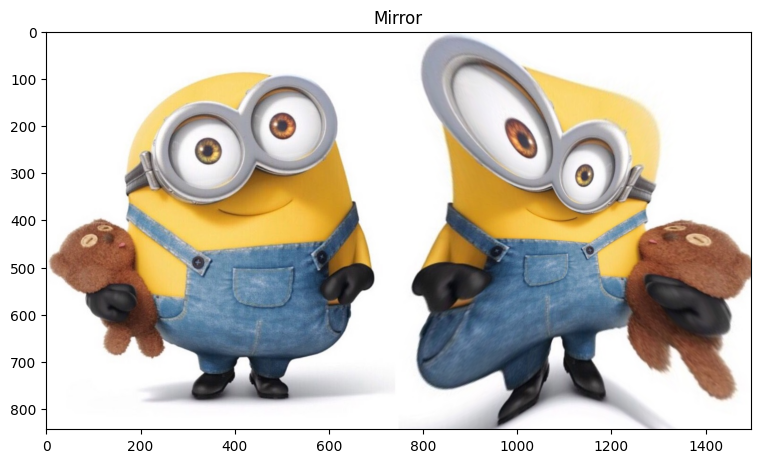

In [24]:
plt.figure(figsize=(20, 20))

# Reading the input image. Pass the path of image you would like to use as input image.
img = cv2.imread("/content/minions.jpg")
H,W = img.shape[:2]

# Creating the virtual camera object
c1 = vcam(H=H,W=W)

# Creating the surface object
plane = meshGen(H,W)

# We generate a mirror where for each 3D point, its Z coordinate is defined as Z = 20*[ sin(2*pi*(x/w-1/4))) + sin(2*pi*(y/h-1/4))) ]

plane.Z += 20*np.sin(2*np.pi*((plane.X-plane.W/4.0)/plane.W)) + 20*np.sin(2*np.pi*((plane.Y-plane.H/4.0)/plane.H))

pts3d = plane.getPlane()

pts2d = c1.project(pts3d)
map_x,map_y = c1.getMaps(pts2d)

output = cv2.remap(img,map_x,map_y,interpolation=cv2.INTER_LINEAR)

plt.subplot(1, 2,1)
plt.title("Mirror")
plt.imshow(cv2.cvtColor(np.hstack((img,output)), cv2.COLOR_BGR2RGB))